In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather = pd.read_csv("data/DailyDelhiClimateTrain.csv", parse_dates=["date"])
energy = pd.read_excel("data/HS861M 2010-.xlsx", header=2, parse_dates=["Year", "Month"])
stocks = pd.read_csv("data/all_stocks_5yr.csv", parse_dates=["date"])

<ipython-input-3-3ee0493a7e1c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  energy = pd.read_excel("data/HS861M 2010-.xlsx", header=2, parse_dates=["Year", "Month"])


In [4]:
weather.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
energy.head()

,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars.1,Megawatthours.1,...,Count.2,Cents/kWh.2,Thousand Dollars.3,Megawatthours.3,Count.3,Cents/kWh.3,Thousand Dollars.4,Megawatthours.4,Count.4,Cents/kWh.4
0,2024,9,AK,Preliminary,36729.95,142905.34,300906.0,25.70,44982.26,207049.42,...,1225.0,17.99,0.00,0.00,0.0,0.00,102204.73,463854.91,359956.0,22.03
1,2024,9,AL,Preliminary,448388.61,2921265.80,2412106.0,15.35,284924.53,2107587.40,...,7206.0,7.18,0.00,0.00,0.0,0.00,918764.27,7613089.50,2805950.0,12.07
2,2024,9,AR,Preliminary,221846.98,1736850.90,1489507.0,12.77,115180.46,1138069.20,...,40277.0,6.76,3.69,26.48,2.0,13.94,453593.08,4600375.20,1739367.0,9.86
3,2024,9,AZ,Preliminary,650834.54,4353796.00,3108084.0,14.95,418586.09,3375933.10,...,7010.0,7.94,102.33,900.67,2.0,11.36,1166221.90,8948224.20,3460953.0,13.03
4,2024,9,CA,Preliminary,2738275.80,8653609.40,13931962.0,31.64,2965615.30,10180795.00,...,143234.0,24.43,11258.82,65893.55,13.0,17.09,6714323.90,22989697.00,15818905.0,29.21


In [6]:
energy = energy.iloc[:-1]

In [7]:
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [8]:
energy['Date'] = energy['Year'].astype(str) + '-' + energy['Month'].astype(str)
energy = energy.drop(columns=['Year', 'Month'])
energy.head()

<ipython-input-8-fc6913c6ffd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy['Date'] = energy['Year'].astype(str) + '-' + energy['Month'].astype(str)


,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars.1,Megawatthours.1,Count.1,Cents/kWh.1,...,Cents/kWh.2,Thousand Dollars.3,Megawatthours.3,Count.3,Cents/kWh.3,Thousand Dollars.4,Megawatthours.4,Count.4,Cents/kWh.4,Date
0,AK,Preliminary,36729.95,142905.34,300906.0,25.70,44982.26,207049.42,57825.0,21.73,...,17.99,0.00,0.00,0.0,0.00,102204.73,463854.91,359956.0,22.03,2024-9
1,AL,Preliminary,448388.61,2921265.80,2412106.0,15.35,284924.53,2107587.40,386638.0,13.52,...,7.18,0.00,0.00,0.0,0.00,918764.27,7613089.50,2805950.0,12.07,2024-9
2,AR,Preliminary,221846.98,1736850.90,1489507.0,12.77,115180.46,1138069.20,209581.0,10.12,...,6.76,3.69,26.48,2.0,13.94,453593.08,4600375.20,1739367.0,9.86,2024-9
3,AZ,Preliminary,650834.54,4353796.00,3108084.0,14.95,418586.09,3375933.10,345857.0,12.40,...,7.94,102.33,900.67,2.0,11.36,1166221.90,8948224.20,3460953.0,13.03,2024-9
4,CA,Preliminary,2738275.80,8653609.40,13931962.0,31.64,2965615.30,10180795.00,1743696.0,29.13,...,24.43,11258.82,65893.55,13.0,17.09,6714323.90,22989697.00,15818905.0,29.21,2024-9


In [9]:
stocks['date'] = stocks['date'].dt.to_period('M')
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02,14.94,14.96,13.16,13.99,31879900,AAL


In [10]:
weather['date'] = weather['date'].dt.to_period('M')
weather.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01,7.400000,92.000000,2.980000,1017.800000
2,2013-01,7.166667,87.000000,4.633333,1018.666667
3,2013-01,8.666667,71.333333,1.233333,1017.166667
4,2013-01,6.000000,86.833333,3.700000,1016.500000


In [11]:
energy['Date'] = pd.to_datetime(energy['Date'], format='%Y-%m')

In [12]:
energy['Date'] = energy['Date'].dt.to_period('M')
energy.head()

,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars.1,Megawatthours.1,Count.1,Cents/kWh.1,...,Cents/kWh.2,Thousand Dollars.3,Megawatthours.3,Count.3,Cents/kWh.3,Thousand Dollars.4,Megawatthours.4,Count.4,Cents/kWh.4,Date
0,AK,Preliminary,36729.95,142905.34,300906.0,25.70,44982.26,207049.42,57825.0,21.73,...,17.99,0.00,0.00,0.0,0.00,102204.73,463854.91,359956.0,22.03,2024-09
1,AL,Preliminary,448388.61,2921265.80,2412106.0,15.35,284924.53,2107587.40,386638.0,13.52,...,7.18,0.00,0.00,0.0,0.00,918764.27,7613089.50,2805950.0,12.07,2024-09
2,AR,Preliminary,221846.98,1736850.90,1489507.0,12.77,115180.46,1138069.20,209581.0,10.12,...,6.76,3.69,26.48,2.0,13.94,453593.08,4600375.20,1739367.0,9.86,2024-09
3,AZ,Preliminary,650834.54,4353796.00,3108084.0,14.95,418586.09,3375933.10,345857.0,12.40,...,7.94,102.33,900.67,2.0,11.36,1166221.90,8948224.20,3460953.0,13.03,2024-09
4,CA,Preliminary,2738275.80,8653609.40,13931962.0,31.64,2965615.30,10180795.00,1743696.0,29.13,...,24.43,11258.82,65893.55,13.0,17.09,6714323.90,22989697.00,15818905.0,29.21,2024-09


In [13]:
weather.set_index('date', inplace=True)
weather.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01,10.000000,84.500000,0.000000,1015.666667
2013-01,7.400000,92.000000,2.980000,1017.800000
2013-01,7.166667,87.000000,4.633333,1018.666667
2013-01,8.666667,71.333333,1.233333,1017.166667
2013-01,6.000000,86.833333,3.700000,1016.500000


In [14]:
stocks.set_index('date', inplace=True)
stocks.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02,15.07,15.12,14.63,14.75,8407500,AAL
2013-02,14.89,15.01,14.26,14.46,8882000,AAL
2013-02,14.45,14.51,14.10,14.27,8126000,AAL
2013-02,14.30,14.94,14.25,14.66,10259500,AAL
2013-02,14.94,14.96,13.16,13.99,31879900,AAL


In [15]:
energy.set_index('Date', inplace=True)
energy.head()

,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars.1,Megawatthours.1,Count.1,Cents/kWh.1,...,Count.2,Cents/kWh.2,Thousand Dollars.3,Megawatthours.3,Count.3,Cents/kWh.3,Thousand Dollars.4,Megawatthours.4,Count.4,Cents/kWh.4
Date,,,,,,,,,,,,,,,,,,,,,
2024-09,AK,Preliminary,36729.95,142905.34,300906.0,25.70,44982.26,207049.42,57825.0,21.73,...,1225.0,17.99,0.00,0.00,0.0,0.00,102204.73,463854.91,359956.0,22.03
2024-09,AL,Preliminary,448388.61,2921265.80,2412106.0,15.35,284924.53,2107587.40,386638.0,13.52,...,7206.0,7.18,0.00,0.00,0.0,0.00,918764.27,7613089.50,2805950.0,12.07
2024-09,AR,Preliminary,221846.98,1736850.90,1489507.0,12.77,115180.46,1138069.20,209581.0,10.12,...,40277.0,6.76,3.69,26.48,2.0,13.94,453593.08,4600375.20,1739367.0,9.86
2024-09,AZ,Preliminary,650834.54,4353796.00,3108084.0,14.95,418586.09,3375933.10,345857.0,12.40,...,7010.0,7.94,102.33,900.67,2.0,11.36,1166221.90,8948224.20,3460953.0,13.03
2024-09,CA,Preliminary,2738275.80,8653609.40,13931962.0,31.64,2965615.30,10180795.00,1743696.0,29.13,...,143234.0,24.43,11258.82,65893.55,13.0,17.09,6714323.90,22989697.00,15818905.0,29.21


In [16]:
start_date = max(weather.index.min(), energy.index.min(), stocks.index.min())
end_date = min(weather.index.max(), energy.index.max(), stocks.index.max())


In [17]:
weather = weather.sort_index()
energy = energy.sort_index()
stocks = stocks.sort_index()

In [18]:
weather_filtered = weather.loc[start_date:end_date]
energy_filtered = energy.loc[start_date:end_date]
stocks_filtered = stocks.loc[start_date:end_date]


In [19]:
weather_filtered

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-02,16.000000,73.000000,2.220000,1016.000000
2013-02,16.285714,77.571429,1.328571,1017.142857
2013-02,18.000000,65.571429,1.857143,1015.285714
2013-02,17.428571,74.285714,11.114286,1014.571429
2013-02,16.625000,92.375000,9.725000,1016.375000
...,...,...,...,...
2016-12,17.217391,68.043478,3.547826,1015.565217
2016-12,15.238095,87.857143,6.000000,1016.904762
2016-12,14.095238,89.666667,6.266667,1017.904762


In [20]:
stocks_filtered

,open,high,low,close,volume,Name
date,,,,,,
2013-02,15.070,15.1200,14.630,14.750,8407500,AAL
2013-02,15.910,15.9500,15.860,15.920,3400091,DRE
2013-02,15.870,15.9500,15.780,15.860,5031910,DRE
2013-02,15.900,16.1000,15.900,16.070,4437733,DRE
2013-02,39.775,41.0400,39.775,40.715,8353746,MPC
...,...,...,...,...,...,...
2017-01,114.410,115.4400,112.900,115.090,936306,AMP
2017-01,39.680,39.7283,39.410,39.610,5050523,ATVI
2017-01,114.460,115.0900,113.220,115.060,1055341,AMP


In [21]:
energy_filtered

,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars.1,Megawatthours.1,Count.1,Cents/kWh.1,...,Count.2,Cents/kWh.2,Thousand Dollars.3,Megawatthours.3,Count.3,Cents/kWh.3,Thousand Dollars.4,Megawatthours.4,Count.4,Cents/kWh.4
Date,,,,,,,,,,,,,,,,,,,,,
2013-02,IN,Final,308488.44,2982513.30,2764892.0,10.34,173386.75,1847266.80,346087.0,9.39,...,17779.0,6.64,196.94,1912.75,1.0,10.30,736686.25,8668688.1,3128759.0,8.50
2013-02,KS,Final,111567.67,986519.21,1219014.0,11.31,108524.16,1127656.20,222739.0,9.62,...,25640.0,7.38,0.00,0.00,0.0,0.00,281680.66,2948410.6,1467393.0,9.55
2013-02,KY,Final,229275.59,2413819.70,1925932.0,9.50,131039.83,1495303.80,299706.0,8.76,...,7154.0,5.46,0.00,0.00,0.0,0.00,552756.45,7434496.9,2232792.0,7.44
2013-02,LA,Final,202967.26,2212640.30,2001940.0,9.17,161113.00,1772827.00,279998.0,9.09,...,18592.0,5.84,97.07,982.08,0.0,9.88,508832.69,6462258.4,2300530.0,7.87
2013-02,MN,Final,226889.09,2033584.40,2321923.0,11.16,160249.30,1776965.40,280187.0,9.02,...,11252.0,6.83,155.39,1625.06,1.0,9.56,505718.28,5544975.4,2613363.0,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01,NM,Final,72070.82,602132.78,878730.0,11.97,63380.53,658277.29,143401.0,9.63,...,9228.0,5.67,0.00,0.00,0.0,0.00,170014.39,1870386.5,1031359.0,9.09
2017-01,NV,Final,106054.12,919135.17,1254353.0,11.54,61833.68,795500.44,162089.0,7.77,...,3228.0,4.96,55.00,749.00,1.0,7.34,217166.52,2707725.3,1419671.0,8.02
2017-01,NY,Final,770006.99,4450518.90,7127955.0,17.30,882541.82,6358592.10,1081479.0,13.88,...,7036.0,5.87,29042.62,244004.15,8.0,11.90,1761739.90,12419552.0,8216478.0,14.19


In [22]:
weather_data = weather[['meantemp', 'humidity', 'wind_speed','meanpressure']].to_numpy()

In [23]:
stocks_data = stocks[['open','high','low','close','volume']].to_numpy()

In [24]:
energy_data = energy[['Megawatthours.4']].to_numpy()

In [25]:
weather_data = np.where(np.isnan(weather_data), np.nanmean(weather_data, axis=0), weather_data)

In [26]:
energy_data = np.where(np.isnan(energy_data), np.nanmean(energy_data, axis=0), energy_data)

In [27]:
stocks_data = np.where(np.isnan(stocks_data), np.nanmean(stocks_data, axis=0), stocks_data)

In [28]:
# Moyenne mobile
cumsum = np.cumsum(np.insert(weather_data[:, 0], 0, 0))  # Température en colonne 0
moving_avg = (cumsum[7:] - cumsum[:-7]) / 7
print(moving_avg)

[ 7.6047619   7.4414966   8.38435374 ... 15.98025194 15.65660191
 15.08517334]


In [29]:
# Volatilité glissante
log_returns = np.log(stocks_data[1:] / stocks_data[:-1])
volatility = np.std(log_returns[:30])  # Exemple pour une fenêtre de 30 jours
print(volatility)

0.4018040971021772


<ipython-input-29-2ab8608aa9e0>:2: RuntimeWarning: divide by zero encountered in divide
  log_returns = np.log(stocks_data[1:] / stocks_data[:-1])
<ipython-input-29-2ab8608aa9e0>:2: RuntimeWarning: divide by zero encountered in log
  log_returns = np.log(stocks_data[1:] / stocks_data[:-1])


In [30]:
# Consommation moyenne journalière
daily_energy_avg = energy_data.mean(axis=1)
print(daily_energy_avg)

[ 1578332.    1017191.    6128757.   ... 11224646.    4676984.7
   463854.91]


In [36]:
# Calculate daily log returns
log_returns = np.log(stocks_data[1:] / stocks_data[:-1])

# Calculate daily profitability using log returns
daily_profitability = log_returns

# Print or use the 'daily_profitability' array
daily_profitability

#volatilité sur 30 j
rolling_volatility = np.array([
    daily_profitability[i:i+30].std() for i in range(len(daily_profitability) - 30)
])

<ipython-input-36-f4dec1930866>:2: RuntimeWarning: divide by zero encountered in divide
  log_returns = np.log(stocks_data[1:] / stocks_data[:-1])
<ipython-input-36-f4dec1930866>:2: RuntimeWarning: divide by zero encountered in log
  log_returns = np.log(stocks_data[1:] / stocks_data[:-1])


Weather Data Statistics:
Mean: [  25.49552066   60.77170158    6.80220875 1011.10454759]
Standard Deviation: [  7.34558926  16.76391611   4.56004184 180.17001906]
Quantiles: [[  18.85714286   50.375         3.475      1001.58035714]
 [  27.71428571   62.625         6.22166667 1008.56349206]
 [  31.30580357   72.21875       9.23823529 1014.94490132]]

Energy Data Statistics:
Mean: [6197134.76324028]
Standard Deviation: [6221760.21441475]
Quantiles: [[1949232.9 ]
 [4692935.1 ]
 [8184800.35]]

Stocks Data Statistics:
Mean: [8.30233343e+01 8.37783107e+01 8.22560964e+01 8.30437628e+01
 4.32182340e+06]
Standard Deviation: [9.73778252e+01 9.82068050e+01 9.65067195e+01 9.73896693e+01
 8.69360249e+06]
Quantiles: [[4.02200000e+01 4.06200000e+01 3.98300000e+01 4.02450000e+01
  1.07032050e+06]
 [6.25900000e+01 6.31500000e+01 6.20200000e+01 6.26200000e+01
  2.08209350e+06]
 [9.43700000e+01 9.51800000e+01 9.35353750e+01 9.44100000e+01
  4.28450925e+06]]

Correlation Matrix:
[[ 1.         -0.01798025

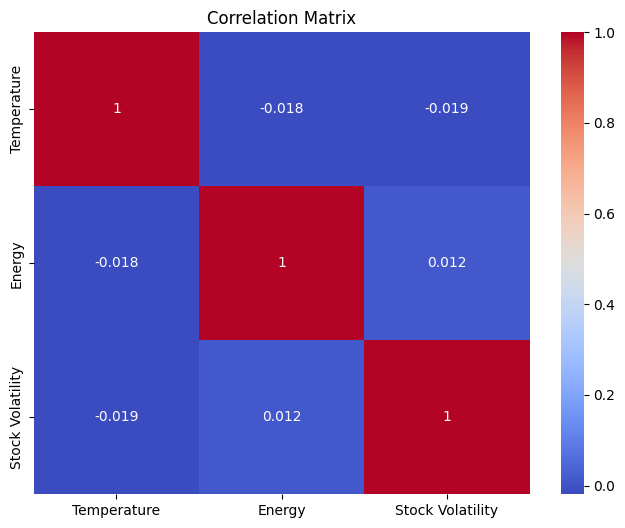

In [40]:
# Descriptive statistics
print("Weather Data Statistics:")
print("Mean:", np.mean(weather_data, axis=0))
print("Standard Deviation:", np.std(weather_data, axis=0))
print("Quantiles:", np.quantile(weather_data, [0.25, 0.5, 0.75], axis=0))

print("\nEnergy Data Statistics:")
print("Mean:", np.mean(energy_data, axis=0))
print("Standard Deviation:", np.std(energy_data, axis=0))
print("Quantiles:", np.quantile(energy_data, [0.25, 0.5, 0.75], axis=0))

print("\nStocks Data Statistics:")
print("Mean:", np.mean(stocks_data, axis=0))
print("Standard Deviation:", np.std(stocks_data, axis=0))
print("Quantiles:", np.quantile(stocks_data, [0.25, 0.5, 0.75], axis=0))


# Correlation Matrix (Example with Temperature, Energy, and Stock Volatility)
# Assuming 'moving_avg' represents temperature, 'daily_energy_avg' represents energy,
# and 'rolling_volatility' represents stock volatility. Adjust these variables if needed
# Ensure all the arrays have the same length
min_len = min(len(moving_avg), len(daily_energy_avg), len(rolling_volatility))
moving_avg = moving_avg[:min_len]
daily_energy_avg = daily_energy_avg[:min_len]
rolling_volatility = rolling_volatility[:min_len]

data_for_correlation = np.column_stack((moving_avg, daily_energy_avg, rolling_volatility))

correlation_matrix = np.corrcoef(data_for_correlation, rowvar=False)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            xticklabels=['Temperature', 'Energy', 'Stock Volatility'],
            yticklabels=['Temperature', 'Energy', 'Stock Volatility'])
plt.title("Correlation Matrix")
plt.show()

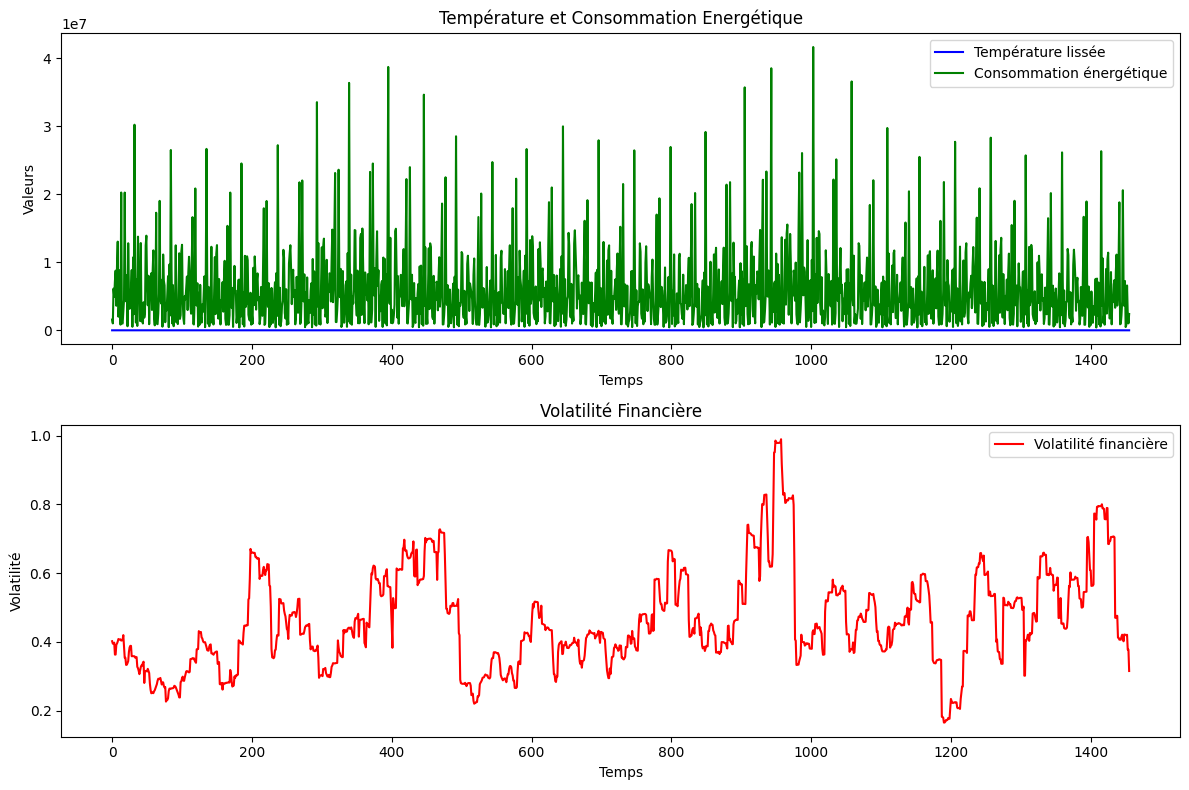

In [42]:
fig = plt.figure(figsize=(12, 8))

# Main plot: Temperature and Energy
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(moving_avg, label='Température lissée', color='blue')
ax1.plot(daily_energy_avg, label='Consommation énergétique', color='green')
ax1.set_xlabel('Temps')
ax1.set_ylabel('Valeurs')
ax1.set_title('Température et Consommation Energétique')
ax1.legend()

# Subplot: Volatility
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(rolling_volatility, label='Volatilité financière', color='red')
ax2.set_xlabel('Temps')
ax2.set_ylabel('Volatilité')
ax2.set_title('Volatilité Financière')
ax2.legend()


plt.tight_layout()
plt.show()

Regression Equation: Energy Consumption = 6425675.14 + -14578.73 * Temperature
Predicted Energy Consumption at 25°C: 6061206.92


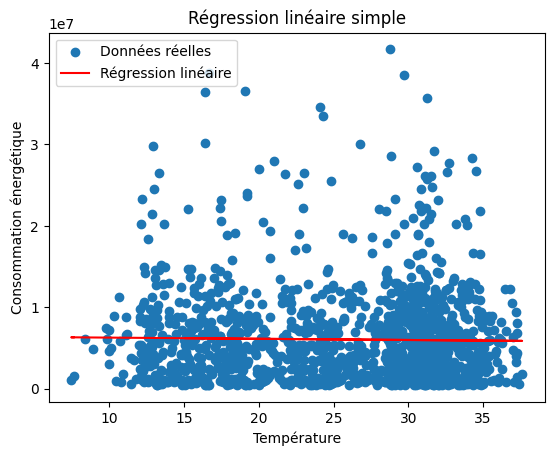

In [43]:
# Prepare the data
X = moving_avg.reshape(-1, 1)  # Temperature as the independent variable
y = daily_energy_avg           # Energy consumption as the dependent variable

# Add a bias term (intercept) to the X matrix
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Calculate the coefficients using the normal equation
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

# Extract the intercept and slope
intercept = coefficients[0]
slope = coefficients[1]

# Print the regression equation
print(f"Regression Equation: Energy Consumption = {intercept:.2f} + {slope:.2f} * Temperature")

# Predict energy consumption for a given temperature (example)
temperature = 25
predicted_energy = intercept + slope * temperature
print(f"Predicted Energy Consumption at {temperature}°C: {predicted_energy:.2f}")

# Plot the regression line
plt.scatter(moving_avg, daily_energy_avg, label='Données réelles')
plt.plot(moving_avg, intercept + slope * moving_avg, color='red', label='Régression linéaire')
plt.xlabel('Température')
plt.ylabel('Consommation énergétique')
plt.title('Régression linéaire simple')
plt.legend()
plt.show()